Importamos librerías

In [ ]:
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)
md_bigrams[:10]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '(')]

Obtenemos los bigramas más frecuentes en el texto

In [ ]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

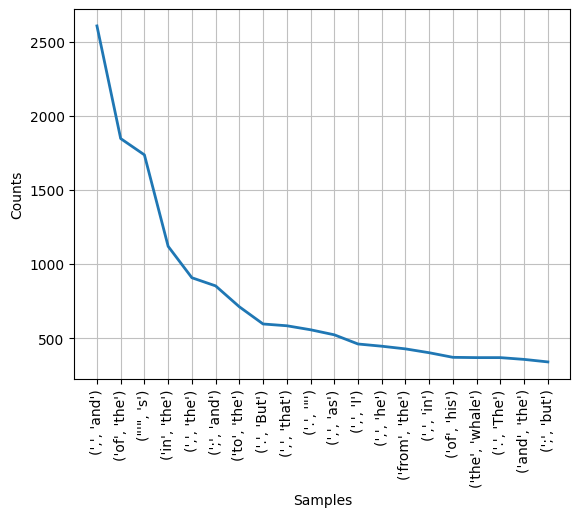

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

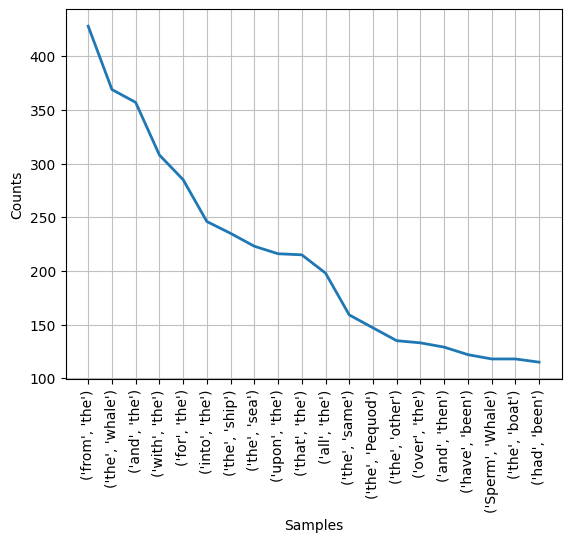

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

Tri-gramas

In [ ]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1,3))
fdist = FreqDist(md_trigrams)
md_trigrams[:10]

[('[', 'Moby', 'Dick'),
 ('Moby', 'Dick', 'by'),
 ('Dick', 'by', 'Herman'),
 ('by', 'Herman', 'Melville'),
 ('Herman', 'Melville', '1851'),
 ('Melville', '1851', ']'),
 ('1851', ']', 'ETYMOLOGY'),
 (']', 'ETYMOLOGY', '.'),
 ('ETYMOLOGY', '.', '('),
 ('.', '(', 'Supplied')]

In [ ]:
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

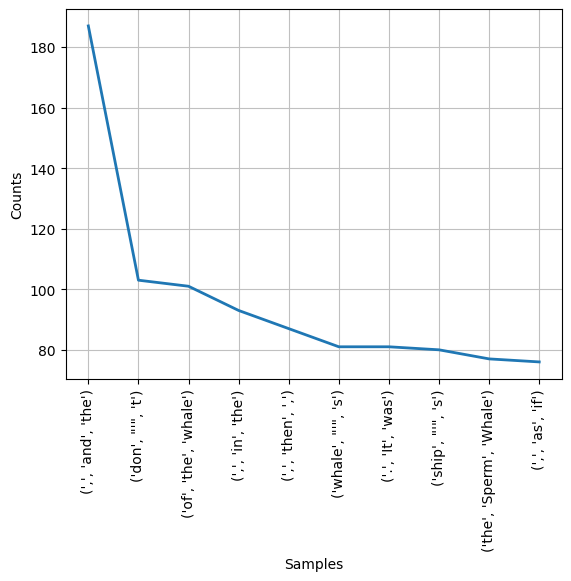

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [ ]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]  
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()           #Genera como si fuera una hoja de cálculo en excel pero en Python
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])  #Genera una columna dentro de la tabla 
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

bi_gram    word_0     word_1  bi_gram_freq  word_0_freq  \
0        (reaped, harvest)    reaped    harvest             1            3   
1         (but, shattered)       but  shattered             2         1113   
2        (produced, their)  produced      their             1            6   
3          (this, ominous)      this    ominous             1         1280   
4               (but, thy)       but        thy             1         1113   
...                    ...       ...        ...           ...          ...   
67937          (the, foul)       the       foul             4        13721   
67938        (Curse, thee)     Curse       thee             2            2   
67939         (till, Ahab)      till       Ahab             2          121   
67940  (frantic, gestures)   frantic   gestures             1           15   
67941      (only, consist)      only    consist             1          360   

       word_1_freq  
0                4  
1                6  
2              612  
3                3  
4              105  
...            ...  
67937           11  
67938          129  
67939          501  
67940            4  
67941            3  

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)
Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [ ]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

bi_gram    word_0     word_1  bi_gram_freq  word_0_freq  \
0        (reaped, harvest)    reaped    harvest             1            3   
1         (but, shattered)       but  shattered             2         1113   
2        (produced, their)  produced      their             1            6   
3          (this, ominous)      this    ominous             1         1280   
4               (but, thy)       but        thy             1         1113   
...                    ...       ...        ...           ...          ...   
67937          (the, foul)       the       foul             4        13721   
67938        (Curse, thee)     Curse       thee             2            2   
67939         (till, Ahab)      till       Ahab             2          121   
67940  (frantic, gestures)   frantic   gestures             1           15   
67941      (only, consist)      only    consist             1          360   

       word_1_freq        PMI  log(bi_gram_freq)  
0                4  -3.584963                0.0  
1                6 -11.705200                1.0  
2              612 -11.842350                0.0  
3                3 -11.906891                0.0  
4              105 -16.834483                0.0  
...            ...        ...                ...  
67937           11 -15.203530                2.0  
67938          129  -7.011227                1.0  
67939          501 -14.887530                1.0  
67940            4  -5.906891                0.0  
67941            3 -10.076816                0.0  

[67942 rows x 8 columns]

In [ ]:
df.sort_values(by = 'PMI', ascending=False)

bi_gram       word_0      word_1  bi_gram_freq  \
35265  (painstaking, burrower)  painstaking    burrower             1   
53051    (scornfully, champed)   scornfully     champed             1   
8196     (engrafted, clerical)    engrafted    clerical             1   
11840   (creative, libertines)     creative  libertines             1   
11874         (;--", Immortal)         ;--"    Immortal             1   
...                        ...          ...         ...           ...   
50315               (man, the)          man         the             1   
25882              (some, the)         some         the             1   
54137               (one, the)          one         the             1   
25345               (the, not)          the         not             1   
57111               (the, but)          the         but             1   

       word_0_freq  word_1_freq        PMI  log(bi_gram_freq)  
35265            1            1   0.000000                0.0  
53051            1            1   0.000000                0.0  
8196             1            1   0.000000                0.0  
11840            1            1   0.000000                0.0  
11874            1            1   0.000000                0.0  
...            ...          ...        ...                ...  
50315          508        13721 -22.732783                0.0  
25882          578        13721 -22.919024                0.0  
54137          889        13721 -23.540138                0.0  
25345        13721         1103 -23.851315                0.0  
57111        13721         1113 -23.864336                0.0  

[67942 rows x 8 columns]

In [ ]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
fig.show()

# Medidas pre-construidas en NLTK

In [ ]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [ ]:
finder.apply_freq_filter(20)  #Todo lo que tenga mayor a 20 no lo va a considerar
finder.nbest(bigram_measures.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

# Textos en Español 

In [ ]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents() 
flatten_corpus = [w for l in corpus for w in l] # Generamos una lista plana, quitamos lista de listas

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


In [ ]:
print(corpus[0])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.']


In [ ]:
print(flatten_corpus[:50])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.', 'Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measures.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]